<h1>Term Project</h1> 

<h2>주제 : 주가 예측하기</h2>

(1) 주제 선정 이유 : 금융공학에 관심이 많았는데, 머신러닝 기법을 이용해서 데이터를 다루어보고 싶어서 선정하였다. 현재 내가 시장에서 얻을 수 있는 정보들을 가지고 어느정도로 주가를 예측할 수 있을 지 궁금했고, Neural Network 기법들 중 하나를 선정해 적용해보고 싶어 이와 같은 주제를 선정했다. 


(2) 가설 정의 : 주식은 이전의 주가가 어떤 동향을 나타내었는지도 중요하지만, 오너가 누군지에 따라, 현재 시장 금리와 경쟁 기업의 상황 등 다양한 요소에 영향을 받는다. 텐써플로우를 이용해서 어느정도로 예측할 수 있을 지와 어느 정도의 오차를 보이는지,예측에 도움을 주는 모델마다 어떤 차이를 나타내는지, 데이터 처리과정에 따라 결과가 어떻게 달라지는지에 대해 궁금해 시작하게 되었다. 
활용할 데이터 : 테슬라의 주가, 구글의 주가


-주요 쟁점-

-모델 마다의 차이점

-실제 주가와 예측한 결과값이 어느정도 차이가 있는지.

70퍼센트 혹은 80퍼센트의 데이터를 학습과정에서 사용하고, 20퍼센트에서 30퍼센트의 데이터를 테스트하는 식으로 비교해볼 것이다.

(3) 인터넷을 통한 데이터 획득

테슬라 주가에 관한 데이터 다운

https://finance.yahoo.com/quote/TSLA/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAADHG_yMzCuPA37DlQ9GMklqgPba97aknNZjvoi6p-05jeLAGsepT7XTnHnRhcF3jFV7JbBGJeLYLnUp0P7W6P9ntZt747UrmyO4qMbpEYUu9abTb44jRkIC-925KZhOkCb0b5mYly8UCxA79ccuRbC63JSeddeeDop9TGChba-mt

구글 주가에 대한 데이터 다운


https://finance.yahoo.com/quote/GOOG/history?p=GOOG




(4) 분석을 위한 데이터 가공


엑셀 파일을 읽어와 데이터를 가공해야한다.  텐서플로우를 사용하고, 데이터를 처리하는 과정은 신경망 모델 3가지를 이용해보기로 했다. 



학습시키는 모델 생성 RNN,LSTM,GRU 3가지 방법을 사용할 생각이다.
RNN은 Recurrent Neural Network의 줄임말로 순환신경망이고, 자연어 처리에 자주 쓰이는데, 이걸 사용하기로 한 이유는 RNN은 시간에 민감하기 때문이다. 시간의 개념이 있는 데이터에 대해 RNN을 사용해 RNN을 공부하고 그에 맞는 모델을 만들고 보여줄 것이다.
LSTM 은 롱숏 장단기 기억 네트워크란 말이다. RNN모델은 시간이 지남에 따라 초기에 들어온 데이터의 영향력이 점점 사라진다. 이를 경사도 사라짐 문제라고 한다. 그럼 어떻게 초반의 데이터도 영향을 주게 해야할까? hidden layer의 구조를 다르게 하면 된다. input gate, Forget gate, outputgate로 구성된 메모리블럭. 이렇게 3가지를 이용해서 구성하면 RNN의 경사도 사라짐 문제를 해결할 수 있다.
GRU 는 Gate Recurrent Unit의 줄임말로 리셋 게이트와 업데이트 게이트가 있는게 특징이다. LSTM과 유사한데, 게이트가 3개에서 2개로 줄었다. 


In [1]:
#import 할 부분들
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Model
from keras.layers import GRU
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Attention,Concatenate
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam

In [3]:

#데이터 가져오기
df = pd.read_csv('TSLA.csv')
#어디를 예측할지 정하기
data_to_use = df['Open'].values
#scaler 초기화
scaler = MinMaxScaler(feature_range=(0,1))
sequence_length = 50
#크기 나눠서 학습시킬 부분 나눠주고
train_data_len = int(len(data_to_use) * 0.8)
train_data = data_to_use[:train_data_len]

train_data_scaled = scaler.fit_transform(train_data.reshape(-1, 1))

X_train = []
y_train = []
for i in range(sequence_length, len(train_data_scaled)):
    X_train.append(train_data_scaled[i-sequence_length:i, 0])
    y_train.append(train_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

test_data = data_to_use[train_data_len - sequence_length:]
test_data_scaled = scaler.transform(test_data.reshape(-1, 1))

X_test = []
y_test = []
for i in range(sequence_length, len(test_data_scaled)):
    X_test.append(test_data_scaled[i-sequence_length:i, 0])
    y_test.append(test_data_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# reshape 하기
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


LSTM 모델 생성하는 부분. 

In [4]:
#모델 생성 LSTM
model_LSTM = Sequential()
model_LSTM.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(units=50, return_sequences=False))
model_LSTM.add(Dropout(0.2))

model_LSTM.add(Dense(units=1))

#optimizer은 adam으로 손실함수는 MSE로 설정함.
model_LSTM.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


RNN 모델 생성하기

In [6]:
#모델 생성 RNN

model_RNN = Sequential()
model_RNN.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_RNN.add(Dropout(0.2))
model_RNN.add(SimpleRNN(units=50, return_sequences=False))
model_RNN.add(Dropout(0.2))

model_RNN.add(Dense(units=1))

# optimizer은 adam으로 손실함수는 MSE로 설정함.
model_RNN.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [7]:
#모델 생성 GRU 모델 생성

model_GRU = Sequential()
model_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_GRU.add(Dropout(0.2))
model_GRU.add(GRU(units=50, return_sequences=False))
model_GRU.add(Dropout(0.2))

model_GRU.add(Dense(units=1))

# optimizer은 adam으로 손실함수는 MSE로 설정함.
model_GRU.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


학습 epoch와 batch_size를 적절히 조정해 더 좋은 학습을 시킬 수 있다.

In [12]:
#학습 
model_LSTM.fit(X_train, y_train, epochs=100, batch_size=50)
model_RNN.fit(X_train,y_train,epochs=15,batch_size=30)

model_GRU.fit(X_train,y_train,epochs=60,batch_size=30)


Epoch 1/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0022
Epoch 2/100
4/4 [==============================] - 0s 18ms/step - loss: 0.0028
Epoch 3/100
4/4 [==============================] - 0s 19ms/step - loss: 0.0021
Epoch 4/100
4/4 [==============================] - 0s 18ms/step - loss: 0.0021
Epoch 5/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0025
Epoch 6/100
4/4 [==============================] - 0s 18ms/step - loss: 0.0023
Epoch 7/100
4/4 [==============================] - 0s 18ms/step - loss: 0.0027
Epoch 8/100
4/4 [==============================] - 0s 19ms/step - loss: 0.0025
Epoch 9/100
4/4 [==============================] - 0s 19ms/step - loss: 0.0020
Epoch 10/100
4/4 [==============================] - 0s 19ms/step - loss: 0.0026
Epoch 11/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0021
Epoch 12/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0020
Epoch 13/100
4/4 [==============================]

학습 결과 정리하는 코드

In [13]:
predicted_stock_price_LSTM = model_LSTM.predict(X_test)
predicted_stock_price_LSTM = scaler.inverse_transform(predicted_stock_price_LSTM)
real_stock_price_LSTM = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))


predicted_stock_price_RNN = model_RNN.predict(X_test)
predicted_stock_price_RNN = scaler.inverse_transform(predicted_stock_price_RNN)
real_stock_price_RNN = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))

predicted_stock_price_GRU= model_GRU.predict(X_test)
predicted_stock_price_GRU = scaler.inverse_transform(predicted_stock_price_GRU)
real_stock_price_GRU = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))



2/2 [==============================] - 0s 9ms/step


결과 시각화하기

C:\Users\SHB\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SHB\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SHB\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SHB\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SHB\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from curr

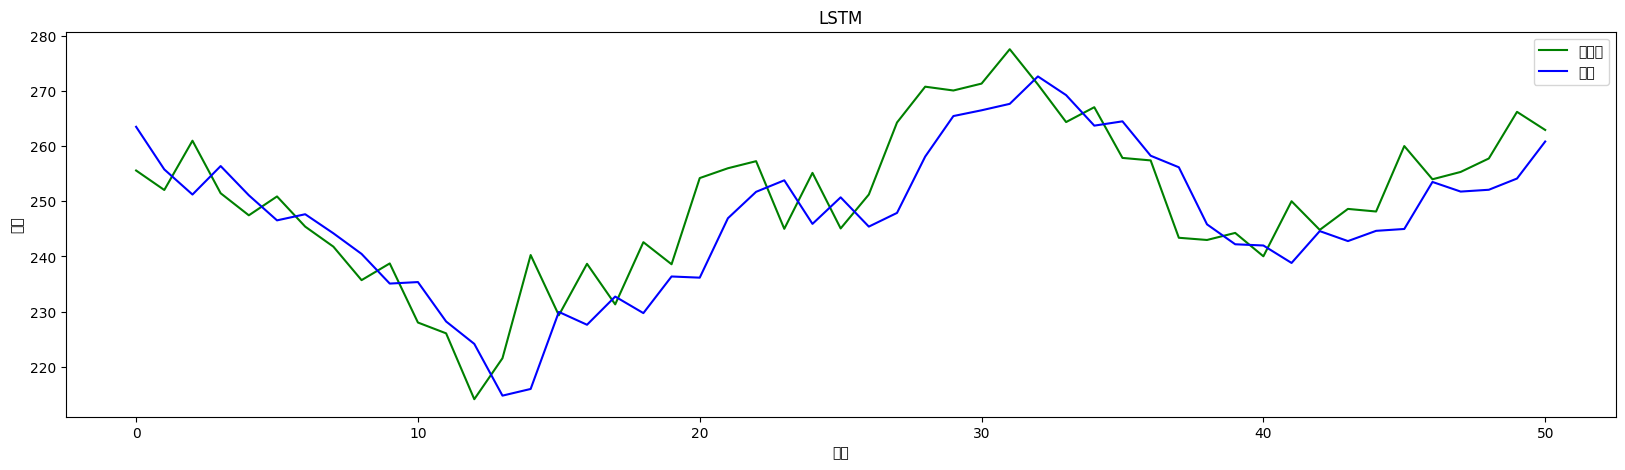

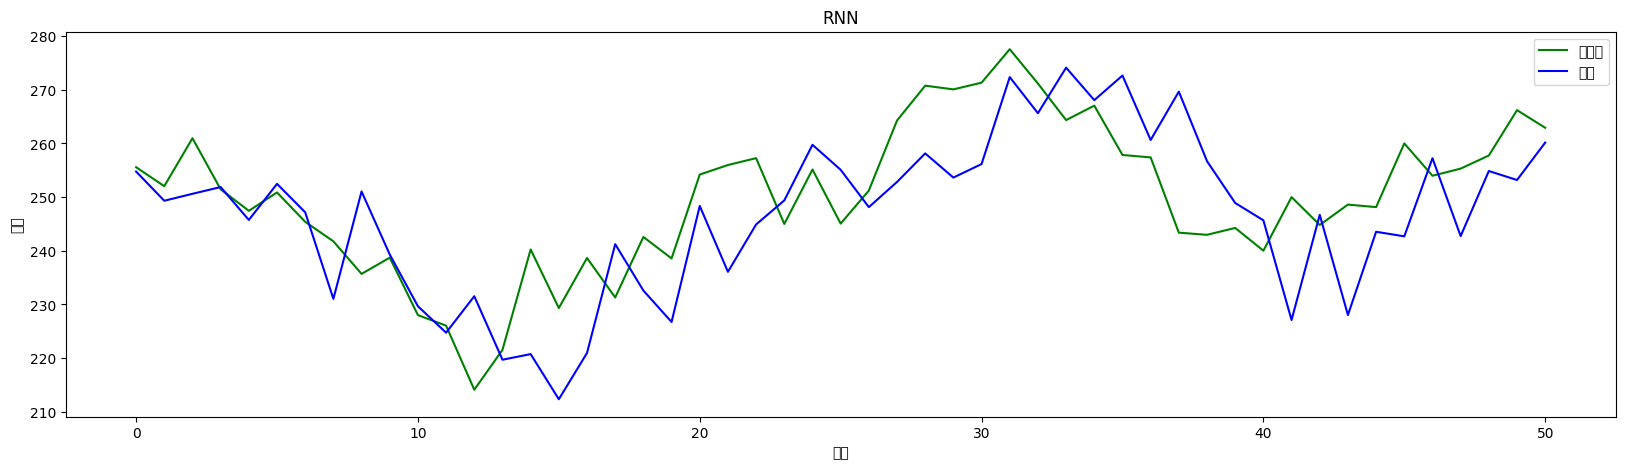

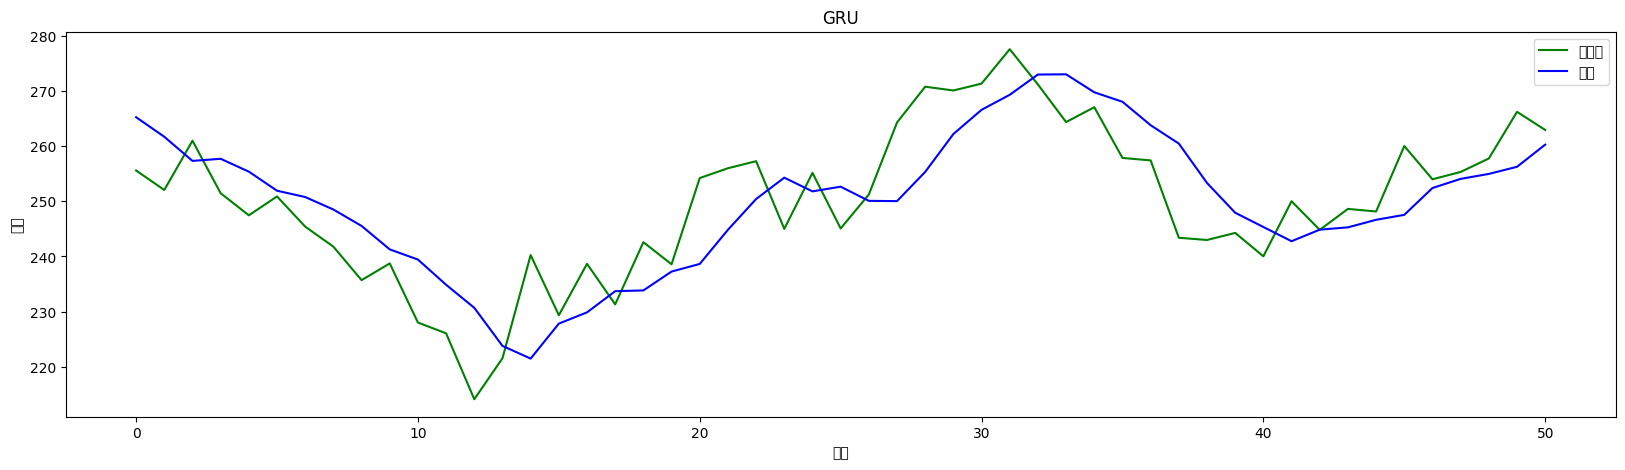

In [14]:


plt.figure(figsize=(20,5))
plt.plot(real_stock_price_LSTM, color='green', label='실제값')
plt.plot(predicted_stock_price_LSTM, color='blue', label='예측')
plt.title('LSTM')
plt.xlabel('시간')
plt.ylabel('주가')
plt.legend()
plt.show()


plt.figure(figsize=(20,5))
plt.plot(real_stock_price_RNN, color='green', label='실제값')
plt.plot(predicted_stock_price_RNN, color='blue', label='예측')
plt.title('RNN')
plt.xlabel('시간')
plt.ylabel('주가')
plt.legend()
plt.show()

plt.figure(figsize=(20,5))
plt.plot(real_stock_price_GRU, color='green', label='실제값')
plt.plot(predicted_stock_price_GRU, color='blue', label='예측')
plt.title('GRU')
plt.xlabel('시간')
plt.ylabel('주가')
plt.legend()
plt.show()







GRU,LSTM,RNN모델을 가지고 와서 batch size와 epoch를 변경해가며, 어떨 때에 최적에 가까워질까 생각해보고, 그나마 최적인 상태를 찾았다.
학습을 많이하다가 overfitting 문제가 발생하기도 하고, 너무 적게 학습하면, 특징을 잘 살리지 못한다.

똑같은 코드 구조에 다른 자료를 넣었을 때, 그 자료는 어느정도 예측하는지 궁금해서 구글 회사의 주식 또한 받아왔다.

Epoch 1/2000
2/2 [==============================] - 2s 29ms/step - loss: 0.4181
Epoch 2/2000
2/2 [==============================] - 0s 24ms/step - loss: 0.2473
Epoch 3/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.1209
Epoch 4/2000
2/2 [==============================] - 0s 25ms/step - loss: 0.0384
Epoch 5/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.0194
Epoch 6/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0511
Epoch 7/2000
2/2 [==============================] - 0s 24ms/step - loss: 0.0522
Epoch 8/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.0199
Epoch 9/2000
2/2 [==============================] - 0s 24ms/step - loss: 0.0124
Epoch 10/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.0147
Epoch 11/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0218
Epoch 12/2000
2/2 [==============================] - 0s 24ms/step - loss: 0.0268
Epoch 13/2000
2/2 [==================

C:\Users\SHB\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SHB\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SHB\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SHB\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SHB\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from curr

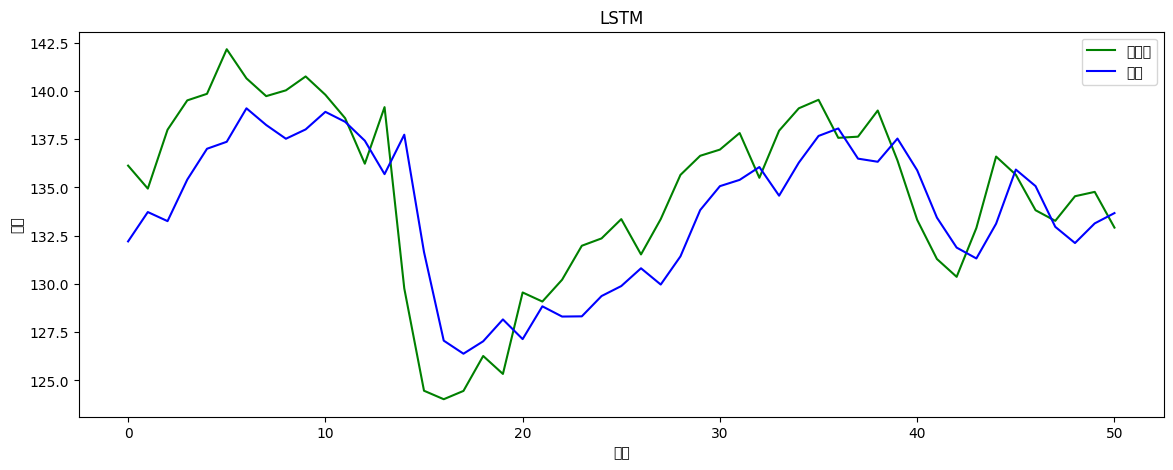

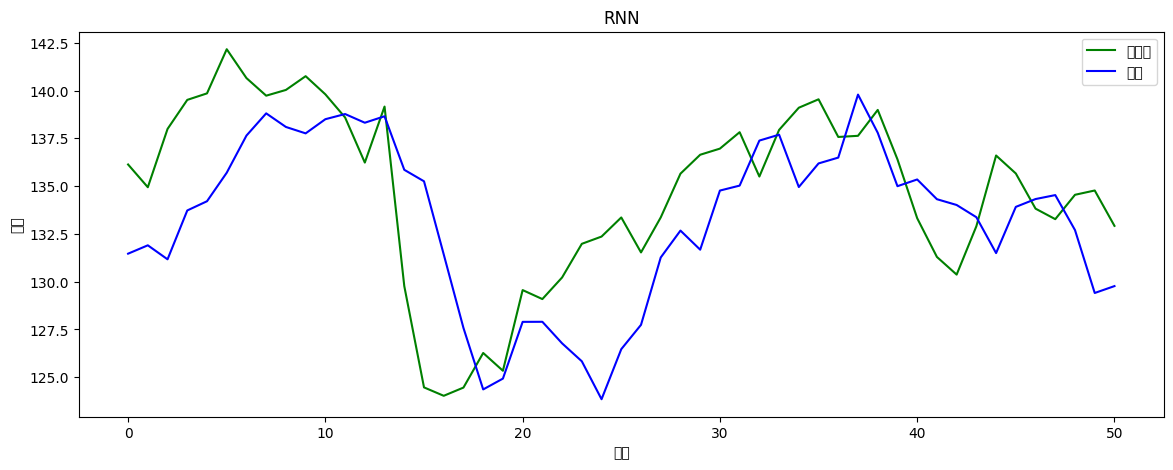

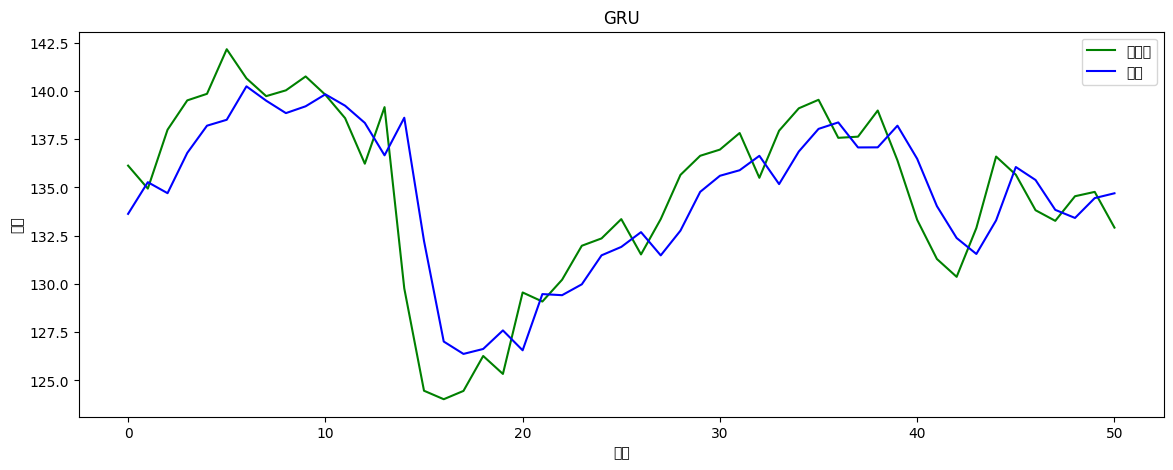

In [15]:
#import 할 부분들
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.layers import GRU
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam

#구글
#데이터 가져오기
df = pd.read_csv('GOOG.csv')
#어디를 예측할지 정하기
data_to_use = df['Open'].values
#scaler 초기화
scaler = MinMaxScaler(feature_range=(0,1))
sequence_length = 50
#크기 나눠서 학습시킬 부분 나눠주고
train_data_len = int(len(data_to_use) * 0.8)
train_data = data_to_use[:train_data_len]

train_data_scaled = scaler.fit_transform(train_data.reshape(-1, 1))

X_train = []
y_train = []
for i in range(sequence_length, len(train_data_scaled)):
    X_train.append(train_data_scaled[i-sequence_length:i, 0])
    y_train.append(train_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

test_data = data_to_use[train_data_len - sequence_length:]
test_data_scaled = scaler.transform(test_data.reshape(-1, 1))

X_test = []
y_test = []
for i in range(sequence_length, len(test_data_scaled)):
    X_test.append(test_data_scaled[i-sequence_length:i, 0])
    y_test.append(test_data_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

#LSTM reshape 하기
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#모델 생성 LSTM
Gmodel_LSTM = Sequential()
Gmodel_LSTM.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
Gmodel_LSTM.add(Dropout(0.2))
Gmodel_LSTM.add(LSTM(units=50, return_sequences=False))
Gmodel_LSTM.add(Dropout(0.2))

Gmodel_LSTM.add(Dense(units=1))

#optimizer은 adam으로 손실함수는 MSE로 설정함.
Gmodel_LSTM.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
#모델 생성 RNN

Gmodel_RNN = Sequential()
Gmodel_RNN.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
Gmodel_RNN.add(Dropout(0.2))
Gmodel_RNN.add(SimpleRNN(units=50, return_sequences=False))
Gmodel_RNN.add(Dropout(0.2))

Gmodel_RNN.add(Dense(units=1))

# optimizer은 adam으로 손실함수는 MSE로 설정함.
Gmodel_RNN.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
#모델 생성 GRU 모델 생성

Gmodel_GRU = Sequential()
Gmodel_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
Gmodel_GRU.add(Dropout(0.2))
Gmodel_GRU.add(GRU(units=50, return_sequences=False))
Gmodel_GRU.add(Dropout(0.2))

Gmodel_GRU.add(Dense(units=1))

# optimizer은 adam으로 손실함수는 MSE로 설정함.
Gmodel_GRU.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
#학습 
Gmodel_LSTM.fit(X_train, y_train, epochs=2000, batch_size=100)
Gmodel_RNN.fit(X_train,y_train,epochs=50,batch_size=50)

Gmodel_GRU.fit(X_train,y_train,epochs=2000,batch_size=50)


Gpredicted_stock_price_LSTM = Gmodel_LSTM.predict(X_test)

Gpredicted_stock_price_LSTM = scaler.inverse_transform(Gpredicted_stock_price_LSTM)
Greal_stock_price_LSTM = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))



Gpredicted_stock_price_RNN = Gmodel_RNN.predict(X_test)

Gpredicted_stock_price_RNN = scaler.inverse_transform(Gpredicted_stock_price_RNN)
Greal_stock_price_RNN = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))


Gpredicted_stock_price_GRU= Gmodel_GRU.predict(X_test)

Gpredicted_stock_price_GRU = scaler.inverse_transform(Gpredicted_stock_price_GRU)
Greal_stock_price_GRU = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))

plt.figure(figsize=(20,5))
plt.plot(Greal_stock_price_LSTM, color='green', label='실제값')
plt.plot(Gpredicted_stock_price_LSTM, color='blue', label='예측')
plt.title('LSTM')
plt.xlabel('시간')
plt.ylabel('주가')
plt.legend()
plt.show()


plt.figure(figsize=(20,5))
plt.plot(Greal_stock_price_RNN, color='green', label='실제값')
plt.plot(Gpredicted_stock_price_RNN, color='blue', label='예측')
plt.title('RNN')
plt.xlabel('시간')
plt.ylabel('주가')
plt.legend()
plt.show()

plt.figure(figsize=(20,5))
plt.plot(Greal_stock_price_GRU, color='green', label='실제값')
plt.plot(Gpredicted_stock_price_GRU, color='blue', label='예측')
plt.title('GRU')
plt.xlabel('시간')
plt.ylabel('주가')
plt.legend()
plt.show()


Open은 장이 열렸을 떄의 가격, Close는 장이 닫힐 떄의 가격
low는 가장 낮았을 때 의 가격, Volume 은 거래량
Adj close는 조정종가다. 주식의 가치를 반영하기 위해 종가를 수정하는데 그것이 조정종가다.

(5) 분석 결과 도출

파란색이 모델이 예측한 부분이고, 초록색이 원본 부분이다. epoch와 batch size를 조절해가면서, 모델의 성능을 더 높이거나 오히려 오버피팅이 일어날 가능성도 있었다. 
epoch와 batch size가 낮았을 때는 , 성능의 정도가 GRU ,RNN,LSTM순으로 좋았다. 하지만 LSTM의 epoch와 batch size를 어느정도 올려주었더니, GRU보다 더 좋은 피팅이 일어났다.


(6) 결론: 본인의 명제/논리가 증명/확인 되었는지와 이를 구체적으로 서술함

 처음에 인공지능에 대해 접하게 되면서 외부조건이 같다면, 성능은 GRU, LSTM,RNN 순으로 좋게 나올 것이라 생각했는데, 꼭 그렇지는 않았다. 또한, 주식을 분석하려면, 주가에 대한 데이터 뿐만 아니라 그에 미치는 여러 요소들이 있다는 점을 알게 되었고, 그래서 완벽한 학습은 어렵다는 것을 알았다. 특정 회사의 주가를 분석하기 위해서, 현재 시장 금리나, 그 회사와 관련된 좋은 뉴스나 나쁜 뉴스, 소비자 물가 지수 와 같이 여러 요소들에 대한 그래프를 특정한 비율을 이용해 가중치에 넣어야 조금 더 잘 학습할 수 있다고 생각했다. 이번에 공부하다가 알게 되었는데, 통계의 학파 중에서 미리 어떤 요소들이 어느정도의 가중치를 가질 것이다는 사실을 알려주고 학습시키는 방법이 있다. 다음엔 경제에 대한 공부도 하면서, 선험적으로 내가 어떤 요소는 어느정도 영향을 주는지 생각해보고 내 예상과 실제 학습 시키면서의 결과를 비교해보면 좋을 것 같다.





(7) 참고문헌: 위의 작업을 위하여 획득한 자료, 인터넷 정보, 논문, 도서 등을 나열함 


딥러닝을 이용한 자연어 처리 입문 / 유원준, 안상준

텐서플로로 배우는 딥러닝 / 솔라리스 지음



(8) 별첨: (3)의 획득한 데이터 원본


(9) 별첨: (4)의 가공된 데이터 원본




(10) 별첨: (3)을 (4)로 변환하는 등의 작업을 위하여 본인이 직접 개발한 Python 소스코드 원본
